In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import kernel as krnl
from deflected_subgradient import solveDeflected
from SVR import SVR
from svr_grid_search import Gridsearch
import matplotlib.pyplot as plt
import copy
import math
from svr_grid_search import Gridsearch

In [3]:
def create_kernel(x, kernel, coef, degree, gamma):
    # interface function to get the desired kernel output
    if kernel == 'linear':
        return krnl.linear(x, x)
    elif kernel == 'rbf':
        return krnl.rbf(x, x, gamma)
    elif kernel == 'poly':
        print('hello')
        return krnl.poly(x, x, gamma, degree, coef)
    elif kernel == 'sigmoid':
        return krnl.sigmoid(x, x, gamma, coef)

# method to get the fstar of a sklearn svr model
def sklearn_fstar(x, y, sklearn_model):
    # create a correct betas array, filling with zeros where needed
    betas = np.zeros(sklearn_model.shape_fit_[0])
    dual_coef_iter = 0
    for i in range(sklearn_model.shape_fit_[0]):
        if i in sklearn_model.support_:
            betas[i] = sklearn_model.dual_coef_[0][dual_coef_iter]
            dual_coef_iter += 1
        else:
            betas[i] = 0.0
    betas = np.vstack(betas)
    
    # create kernel
    K = create_kernel(x, sklearn_model.kernel, sklearn_model.coef0, sklearn_model.degree, sklearn_model.gamma)[0]
    
    # calculate as in below formula
    fstar = (0.5 * np.dot(np.dot(np.transpose(betas), K), betas) 
            + sklearn_model.epsilon * np.sum(np.abs(betas))
            - np.transpose(y).dot(betas))
    return fstar
    

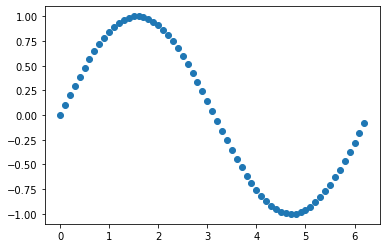

In [4]:
x = np.vstack(np.arange(-0,6.28,0.1))
noising_factor = 1e-3
y = np.array([math.sin(xi) for xi in x])
y = np.array([ yi + noising_factor * (np.random.rand()*yi) for yi in y])
plt.scatter(x,y)
plt.show()

In [6]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
        kernel=["rbf"],
        kparam=[{"gamma":1}],
        box=[0.1,1,10],
        eps=[0.05,0.1,0.5],
        optiargs=[{'eps':1e-2, 'maxiter': 1e4}, {'eps':1e-2, 'maxiter': 3e4}]
    )
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 18 models
(GS - SVR) - model 1/18
Fit time: 16.09426522254944, #SV: 51
	(GS - SVR) - Time taken: 16.09426522254944 - Remaining: 273.60250878334045
(GS - SVR) - model 2/18
Fit time: 44.64163112640381, #SV: 51
	(GS - SVR) - Time taken: 60.73682928085327 - Remaining: 485.8946342468262
(GS - SVR) - model 3/18
Fit time: 14.848570823669434, #SV: 51
	(GS - SVR) - Time taken: 75.5854001045227 - Remaining: 377.9270005226135
(GS - SVR) - model 4/18
Fit time: 44.85637903213501, #SV: 51
	(GS - SVR) - Time taken: 120.44210410118103 - Remaining: 421.5473643541336
(GS - SVR) - model 5/18
Fit time: 15.652563333511353, #SV: 51
	(GS - SVR) - Time taken: 136.09466743469238 - Remaining: 353.8461353302002
(GS - SVR) - model 6/18
Fit time: 44.123095750808716, #SV: 51
	(GS - SVR) - Time taken: 180.2177631855011 - Remaining: 360.4355263710022
(GS - SVR) - model 7/18
Fit time: 14.461760759353638, #SV: 51
	(GS - SVR) - Time taken: 194.67952394485474 - Remaining:

Fit time: 21.739009380340576, #SV: 63
	(GS - SVR) - Time taken: 166.41865801811218 - Remaining: 1081.7212771177292
(GS - SVR) - model 9/60
Fit time: 24.517704486846924, #SV: 63
	(GS - SVR) - Time taken: 190.93699193000793 - Remaining: 1081.9762876033783
(GS - SVR) - model 10/60
Fit time: 23.12011456489563, #SV: 63
	(GS - SVR) - Time taken: 214.05710649490356 - Remaining: 1070.2855324745178
(GS - SVR) - model 11/60
Fit time: 21.92437243461609, #SV: 63
	(GS - SVR) - Time taken: 235.98274421691895 - Remaining: 1051.195860602639
(GS - SVR) - model 12/60
Fit time: 21.860348224639893, #SV: 63
	(GS - SVR) - Time taken: 257.84309244155884 - Remaining: 1031.3723697662354
(GS - SVR) - model 13/60
Fit time: 21.17621874809265, #SV: 63
	(GS - SVR) - Time taken: 279.0193111896515 - Remaining: 1008.7621250702786
(GS - SVR) - model 14/60
Fit time: 20.639172077178955, #SV: 63
	(GS - SVR) - Time taken: 299.6591651439667 - Remaining: 984.5943997587476
(GS - SVR) - model 15/60
Fit time: 20.97107481956482,

BEST FINE GRID SEARCH MODEL: 
Kernel: rbf
Gamma: 1.1172963577399495
Intercept: [-0.05709845]\Optim_args: {'eps': 0.047651585785307295, 'maxiter': 10000.0, 'vareps': 0.05}
Box: 10
T LOSS: 0.0548701858333734
V LOSS: 0.0007494255878468585


In [7]:
import time
start = time.time()
svr = SVR("rbf", {"gamma": 1.1172963577399495}, box=10)
svr.fit(x, y, {'eps': 0.047651585785307295, 'maxiter': 10000.0, 'vareps': 0.05}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

Fit time: 15.877964973449707, #SV: 63
elapsed time 15.878971576690674


b: [-0.10709845]
Gamma: 1.1172963577399495 - Box: 10
PREDICTION (INPUT = 12) [[-0.10709845]]
LOSS: 0.05487018583337348


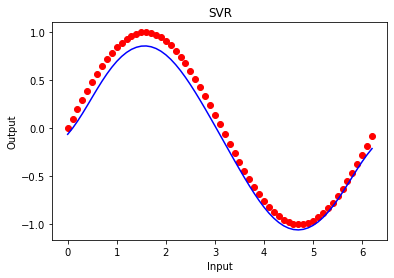

0.9763534600910219

In [8]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

elapsed time 0.005010128021240234
 b: [-0.00889895]
Gamma: 1.1172963577399495 - Box: 10
PREDICTION (INPUT = 12) [-0.00889895]


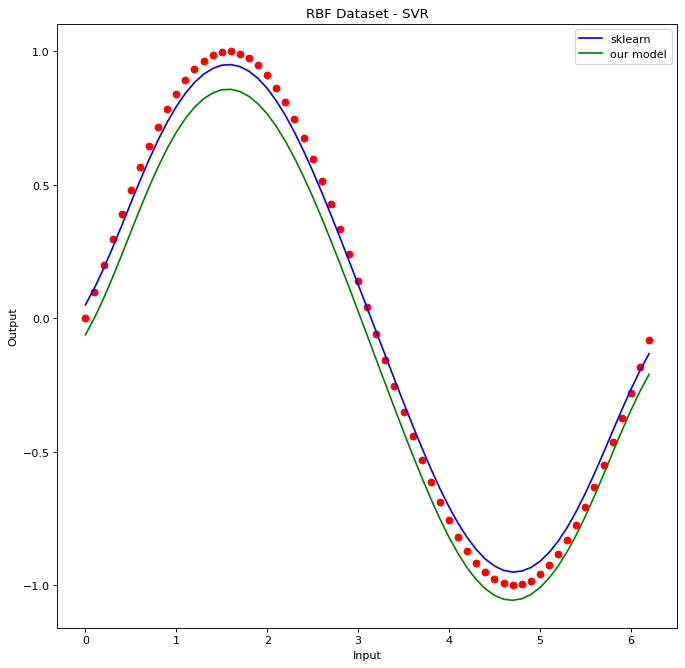

0.9961403183158184

In [9]:
import sklearn.svm as ss

import time
start = time.time()
regressor = ss.SVR(kernel = 'rbf', C=10, epsilon=0.05, max_iter=1e4, gamma=1.1172963577399495)

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# xs = sc_X.fit_transform(x)
# ys = sc_y.fit_transform(y)

regressor.fit(x, y.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
# print(f'PREDICTION (INPUT = {to_predict})', sc_y.inverse_transform(y_pred))
print(f'PREDICTION (INPUT = {to_predict})', y_pred)
sklearn_predict = regressor.predict(x)
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
plt.plot(x, pred, color = 'green', label='our model')
plt.title('RBF Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
r2_score(y, sklearn_predict)

In [ ]:
regressor.support_vectors_

In [ ]:
regressor.support_

In [ ]:
regressor.dual_coef_

In [ ]:
regressor.epsilon

In [ ]:
regressor.intercept_

In [ ]:
params = regressor.get_params()
params['gamma']

In [ ]:
params['C']

In [10]:
sklearn_fstar(x, y, regressor), svr.history['fstar']

(array([[-1.05854248]]), -1.055022988886253)